<a href="https://colab.research.google.com/github/jmross0108/jmross0108/blob/main/Data_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Scrape ESPN.com for Player Statistics
Starting with Passing, then Rushing, then Receiving. In order to have a comprehensive set of offensive statistics.

Passing Statistics

In [ ]:
# Read in the link
fantasy_link = requests.get('https://fantasy.espn.com/football/leaders.html')

# Convert to a BeautifulSoup object
fantasy_stats = bs(fantasy_link.content)


Build the DataFrame for QB Statistics over the 21/22 Season by scraping the data from the ESPN website using BeautifulSoup

In [ ]:
webpage = requests.get('https://www.espn.com/nfl/stats/player')
p = bs(webpage.content)

In [ ]:
pass_table = p.select('div.ResponsiveTable')
df_pass_name =  pd.read_html(str(pass_table))[0]
df_pass_stat_table = p.select('div.Table__ScrollerWrapper.relative.overflow-hidden')
df_pass_stats = pd.read_html(str(df_pass_stat_table))[0]

In [ ]:
qb = pd.concat((df_pass_name,df_pass_stats),axis=1)


Add a wins column to the DataFrame, based on team wins, reqardless of whether or not the Quarterback played, as that column already exists.

In [ ]:
# create a list for the number of wins by team
team_wins = [13,9,12,12,10,10,12,11,8,13,7,10,10,11,9,12,3,9,7,3,9,7,7,8,8,4,9,5,4,4,6,6,9,9,9,8,9,4,4,4,7,11,7,5,8,10,3,8,9,12]

# add the team_wins list to qb dataframe 
qb['team_wins'] = team_wins 

#quickly examine dataframe to make sure the column was added
qb.head()

,RK,Name,POS,GP,CMP,ATT,CMP%,YDS,AVG,YDS/G,LNG,TD,INT,SACK,SYL,QBR,RTG,team_wins
0,1,Tom BradyTB,QB,17,485,719,67.5,5316,7.4,312.7,62,43,12,22,144,68.1,102.1,13
1,2,Justin HerbertLAC,QB,17,443,672,65.9,5014,7.5,294.9,72,38,15,31,214,65.6,97.7,9
2,3,Matthew StaffordLAR,QB,17,404,601,67.2,4886,8.1,287.4,79,41,17,30,243,63.8,102.9,12
3,4,Patrick MahomesKC,QB,17,436,658,66.3,4839,7.4,284.6,75,37,13,28,146,62.2,98.5,12
4,5,Derek CarrLV,QB,17,428,626,68.4,4804,7.7,282.6,61,23,14,40,241,52.4,94.0,10


Now just by looking at the dataframe, there looks to be a couple columns that can be removed. The we can eliminate the RK('ranking), and POS('position') columns don't contribute any information. We can also remove the LNG('longest pass of the season') because it is extremely unlikely that this statistice will be of any use.

In [ ]:
# Now we remove the columns deemed unnecessary 
qb.drop(['RK','POS','LNG'], axis=1, inplace = True)
qb.head()

,Name,GP,CMP,ATT,CMP%,YDS,AVG,YDS/G,TD,INT,SACK,SYL,QBR,RTG,team_wins
0,Tom BradyTB,17,485,719,67.5,5316,7.4,312.7,43,12,22,144,68.1,102.1,13
1,Justin HerbertLAC,17,443,672,65.9,5014,7.5,294.9,38,15,31,214,65.6,97.7,9
2,Matthew StaffordLAR,17,404,601,67.2,4886,8.1,287.4,41,17,30,243,63.8,102.9,12
3,Patrick MahomesKC,17,436,658,66.3,4839,7.4,284.6,37,13,28,146,62.2,98.5,12
4,Derek CarrLV,17,428,626,68.4,4804,7.7,282.6,23,14,40,241,52.4,94.0,10


Now missing team_wins column so we re-add the list to the dataframe

In [ ]:
qb['team_wins'] = team_wins
qb.head()

,Name,GP,CMP,ATT,CMP%,YDS,AVG,YDS/G,TD,INT,SACK,SYL,QBR,RTG,team_wins
0,Tom BradyTB,17,485,719,67.5,5316,7.4,312.7,43,12,22,144,68.1,102.1,13
1,Justin HerbertLAC,17,443,672,65.9,5014,7.5,294.9,38,15,31,214,65.6,97.7,9
2,Matthew StaffordLAR,17,404,601,67.2,4886,8.1,287.4,41,17,30,243,63.8,102.9,12
3,Patrick MahomesKC,17,436,658,66.3,4839,7.4,284.6,37,13,28,146,62.2,98.5,12
4,Derek CarrLV,17,428,626,68.4,4804,7.7,282.6,23,14,40,241,52.4,94.0,10


Now that we have our DataFrame we can do some EDA

In [ ]:
qb.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
GP,50.0,11.860,4.673023,4.0,7.000,13.00,16.000,17.0
CMP,50.0,235.120,138.663245,30.0,90.250,256.00,358.500,485.0
ATT,50.0,361.520,205.637708,47.0,152.750,397.00,528.500,719.0
CMP%,50.0,64.284,4.388359,53.9,60.850,64.95,67.200,74.7
YDS,50.0,2578.800,1553.429320,422.0,969.000,2773.00,3797.500,5316.0
AVG,50.0,7.044,0.869004,4.7,6.450,7.20,7.500,9.0
YDS/G,50.0,198.722,65.188869,66.0,156.725,212.15,239.725,312.7
TD,50.0,16.420,12.210885,2.0,5.000,16.00,22.750,43.0
INT,50.0,8.420,4.759909,1.0,4.250,9.00,12.750,17.0
SACK,50.0,23.860,13.575202,0.0,10.250,28.00,32.750,51.0


In [ ]:
qb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       50 non-null     object 
 1   GP         50 non-null     int64  
 2   CMP        50 non-null     int64  
 3   ATT        50 non-null     int64  
 4   CMP%       50 non-null     float64
 5   YDS        50 non-null     int64  
 6   AVG        50 non-null     float64
 7   YDS/G      50 non-null     float64
 8   TD         50 non-null     int64  
 9   INT        50 non-null     int64  
 10  SACK       50 non-null     int64  
 11  SYL        50 non-null     int64  
 12  QBR        50 non-null     float64
 13  RTG        50 non-null     float64
 14  team_wins  50 non-null     int64  
dtypes: float64(5), int64(9), object(1)
memory usage: 6.0+ KB


In [ ]:
# calculate correlation
corr_matrix = qb.corr('pearson')
#plot correlation
corr_matrix.style.background_gradient(cmap='coolwarm')

,GP,CMP,ATT,CMP%,YDS,AVG,YDS/G,TD,INT,SACK,SYL,QBR,RTG,team_wins
GP,1.000000,0.940726,0.947631,0.263613,0.938258,0.221165,0.743450,0.812203,0.768812,0.830331,0.783048,0.404353,0.272322,0.340019
CMP,0.940726,1.000000,0.995529,0.383127,0.990776,0.238877,0.893452,0.901836,0.783041,0.782236,0.722024,0.493305,0.353645,0.357006
ATT,0.947631,0.995529,1.000000,0.310237,0.983673,0.189847,0.880694,0.883194,0.804576,0.796629,0.736394,0.449559,0.298609,0.315354
CMP%,0.263613,0.383127,0.310237,1.000000,0.389225,0.516988,0.419171,0.411561,0.077415,0.174332,0.154138,0.651449,0.678694,0.430190
YDS,0.938258,0.990776,0.983673,0.389225,1.000000,0.330842,0.907598,0.925640,0.781406,0.783321,0.724327,0.531421,0.404955,0.402102
AVG,0.221165,0.238877,0.189847,0.516988,0.330842,1.000000,0.335303,0.405182,0.032445,0.156056,0.132847,0.581707,0.808871,0.610622
YDS/G,0.743450,0.893452,0.880694,0.419171,0.907598,0.335303,1.000000,0.861377,0.718099,0.691419,0.634968,0.546950,0.400494,0.286571
TD,0.812203,0.901836,0.883194,0.411561,0.925640,0.405182,0.861377,1.000000,0.601184,0.594760,0.539382,0.662154,0.560836,0.544838
INT,0.768812,0.783041,0.804576,0.077415,0.781406,0.032445,0.718099,0.601184,1.000000,0.750719,0.709352,0.137612,-0.099740,0.041537
SACK,0.830331,0.782236,0.796629,0.174332,0.783321,0.156056,0.691419,0.594760,0.750719,1.000000,0.959504,0.183204,0.139957,0.093590


We can see from the correlation matrix that many of the attributes are highly correlated. By looking at the above CMP('completions') and ATT('attempts') don't both neet to be there. The best approach would be to eliminate CMP as CMP% describes the essentially the same thing. Likewise YDS/G can be removed as this is described by YDs('Yards') and GP('Games Played'). SYL('Sack Yards Lost') will most likely be more useful than SACK so SACK will also be removed.

In [ ]:
#remove the columns deemed unnecessary above
qb.drop(['CMP','YDS/G','SACK'],axis=1,inplace=True)
qb.head()

,Name,GP,ATT,CMP%,YDS,AVG,TD,INT,SYL,QBR,RTG,team_wins
0,Tom BradyTB,17,719,67.5,5316,7.4,43,12,144,68.1,102.1,13
1,Justin HerbertLAC,17,672,65.9,5014,7.5,38,15,214,65.6,97.7,9
2,Matthew StaffordLAR,17,601,67.2,4886,8.1,41,17,243,63.8,102.9,12
3,Patrick MahomesKC,17,658,66.3,4839,7.4,37,13,146,62.2,98.5,12
4,Derek CarrLV,17,626,68.4,4804,7.7,23,14,241,52.4,94.0,10


Because YDS is a significantly larger number than the other attributes, it is a good idea to standardize the variables.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


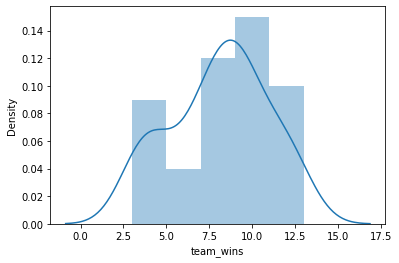

In [ ]:
# split data into target variable and explanatory variables

X = qb.drop(['Name','team_wins','GP'],axis=1)
y = qb['team_wins']

# examine the distribution of the targe variable

sns.distplot(y)

To begin with a linear model can be fit to the data and then evaluated for performance. It is likely that we will have to use a different model due to the skew in target variable.

Scale the data to be fit for the model

In [ ]:
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X = feature_scaler.fit_transform(X)

In [ ]:
# let's fit a logistic regression model to the data

from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X,y)

LinearRegression()

In [ ]:
linear_model.intercept_ 

8.080000000000002

In [ ]:
linear_model.coef_

array([-1.2179585 , -0.51916916,  2.01885213,  0.27552209,  0.09671303,
        0.04302751, -0.79388727,  0.83622493,  1.03762835])

Build a k fold Cross Validation Model

In [ ]:
k_model